# 가제: 청년 정책 정보

알아두면 도움이 될 청년 정책 지원 사이트 모음

청년포털  
https://2030.go.kr/main

정부24
https://2030.go.kr/main

복지로
https://2030.go.kr/main

주택도시기금
https://2030.go.kr/main

온통청년
https://2030.go.kr/main

K=Startup 창업지원포털
https://2030.go.kr/main

>   - 청년 정책 서비스 배포를 위해서 파이썬 라이브러리 패키지를 따로 구분하기 위해서   
>   - virtualenv 라이브러리를 사용하여 가상환경 설정  
```
python3 -m virtualenv Youth
```

상상대로는 경기 안산 청년들을 위한 사이트지만 청년정책 알리미 공간에 있는 정책들은 전국 청년들을 위한 정책들이 많이 있다.  
>   - 현재 시행되고 있는 것 뿐만이 아니라 과거에 시행되었던 것 역시도 포함한다.
>   - 그렇지만 목적이 현재 이용가능한 정책이므로 **모집중**인 것에 초점을 맞춘다.

이를 위해서 HTML 파싱을 위한 도구인 BeautifulSoup 라이브러리를 이용합니다.
> - find/find_all([태그 이름], 속성에 대한 Dictionary)
이렇게 가져온 객체를 dictionary 형태로 속성을 가져올 수 있습니다.

In [45]:
# 상상대로 청년 알리미
import requests
from bs4 import BeautifulSoup 
import pandas as pd

univ_url = "https://www.asyouthspace.kr/notice_1?page={}"
df_list = []

for pg in range(1,10):
    r= requests.get(univ_url.format(pg))
    bs = BeautifulSoup(r.text)
    _list = bs.find('div',{"class":"program_content_wrap"}).find_all('a')
    for i in _list:
        _dict = {'title':i.find('p',{'class':"program_tit"}).text.strip(),'end':i.find('li', {"class":'end'}).text, 'href':i['href'],}
        df_list.append(_dict)

df = pd.DataFrame(df_list)
display(df)


,title,end,href
0,일자리 채움 청년지원금 사업신청 방법 및 사업소개,마감,https://www.asyouthspace.kr/notice_1/83?page=1
1,여성청소년 생리대 바우처 지원,마감,https://www.asyouthspace.kr/notice_1/82?page=1
2,경기도 청년정책 홍보자료 E북,마감,https://www.asyouthspace.kr/notice_1/81?page=1
3,경기 2024년 상반기 대학생 학자금 대출이자 지원,마감,https://www.asyouthspace.kr/notice_1/79?page=1
4,청년 국가기술자격시험 응시료 지원,마감,https://www.asyouthspace.kr/notice_1/78?page=1
...,...,...,...
68,청년정책 알리미 4편 _ 경기도 청소년 교통비 지원 사업,마감,https://www.asyouthspace.kr/notice_1/9?page=6
69,청년정책 알리미 3편 _ 안산시 대학생 본인부담 등록금 반값 지원,마감,https://www.asyouthspace.kr/notice_1/8?page=6
70,청년정책 알리미 2편 _ 경기도 청년면접수당,마감,https://www.asyouthspace.kr/notice_1/7?page=6
71,청년정책알리미1편_청년취업홈런옷장,마감,https://www.asyouthspace.kr/notice_1/6?page=6


In [46]:
pd.DataFrame(df['end'].value_counts())

,count
end,
마감,73


**상상대로 청년 알리미**는 현재 공고문이 73개가 있었지만 진행상태가 모두 **'마감'** 이어서 효용성이 없다고 판단했습니다.


## 청년 포털

청년 포털에서는
>   1. 광역 청년 플랫폼
>   2. 청년 희망 On

으로 청년들을 위한 정보를 제공합니다.

**광역 청년 플랫폼**에서는 각 지방마다 청년 정책을 따로 볼 수 있도록 서비스를 제공합니다.
> -  광역 청년 플랫폼에서 각 지역별로 각 정책을 소개하는 URL을 연결해 줍니다.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

hole_youth_url = "https://2030.go.kr/etc/ythPlatform"
bs = BeautifulSoup(requests.get(hole_youth_url).text)
all_platform_list = []
for i in bs.find('div',{"class":"map-areatwo"}).find('ul').find_all('li'):
    all_platform_list.append({'지역':i.find_all('img')[0]['alt'],'기관':i.find_all('img')[1]['alt'], 'link':i.find('a')['href']})

pd.DataFrame(all_platform_list)

,지역,기관,link
0,서울,청년몽땅정보통,https://youth.seoul.go.kr
1,인천,인천청년포털,https://www.incheon.go.kr/youth
2,경기,경기청년포털,https://youth.gg.go.kr
3,충북,충북청년포털,https://www.chungbuk.go.kr/young/index.do
4,세종,세종청년플랫폼,http://sjnarae.or.kr
5,대전,대전청년포털,https://www.daejeonyouthportal.kr
6,전북,전북청년허브센터,https://www.jb2030.or.kr
7,대구,대구청년커뮤니티포털,https://www.dgjump.com
8,광주,광주청년센터,https://www.gjyouthcenter.kr
9,경남,경남청년정보플랫폼,https://www.gyeongnam.go.kr/youth


16개의 지역 모두 조사하기 보다 청년들의 인구 분포가 많은 지역으로 조사하고자 합니다.

시군구/성/연령별 데이터를 참고로 청년분포를 본다면,

>   출처: KOSIS 문서 작성(갱신)날짜 2024-01-08 

> - 원하는 대로 데이터를 수집하고 집계하기 위해서는 Pandas의 문법과 기능을 잘알고 있어야 하고,  
> - 거기에 더해서 특별한 의미를 담고있는  **정규식**을 안다면 손쉽게 데이터를 다룰 수 있습니다.

In [4]:
import matplotlib
from matplotlib import rc, rcParams
display(matplotlib.get_cachedir())
rc('font',family='NanumGothic')
rcParams

'/home/david/.cache/matplotlib'

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

array([20507268.])

Text(0.5, 1.0, '전국 청년(20-35세) 총 인구수 비교')

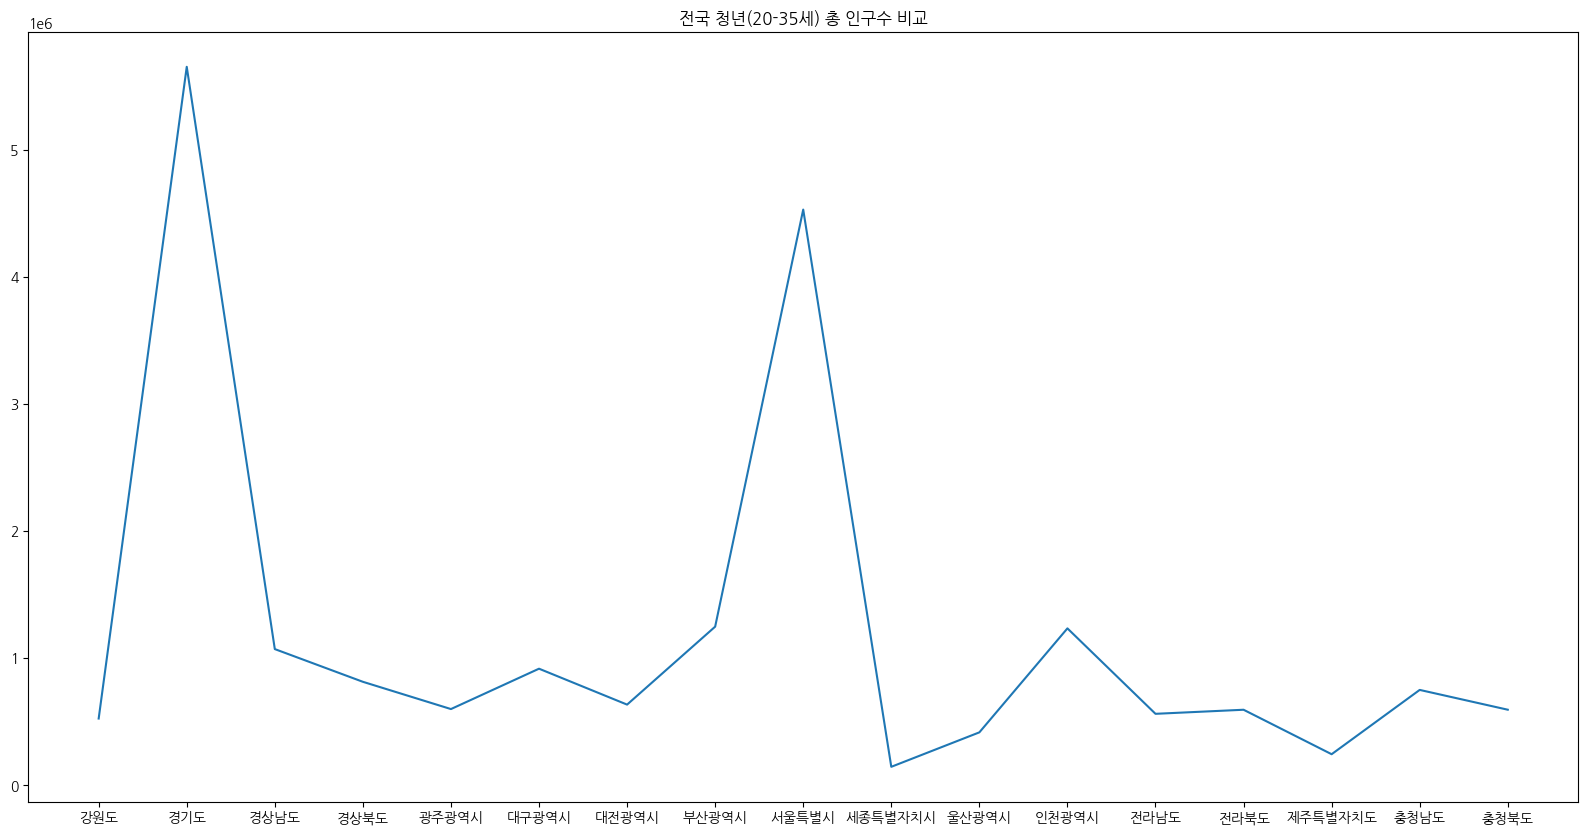

In [44]:
import glob
import re
import matplotlib.pyplot as plt
p = re.compile('([0-9]+)')
csv_file = glob.glob('./Data/*.csv')[0]
pop_df = pd.read_csv(csv_file).melt(id_vars=['시점','행정구역(시군구)별','성별','계'])
pop_df['variable']= pop_df['variable'].str.extract(p)
pop_df['variable'] = pop_df['variable'].apply(lambda x: int(x))
display(pop_df['행정구역(시군구)별'].unique())
_pop_df= pop_df[(pop_df.variable > 19)& (pop_df.variable < 36)].groupby(by=['행정구역(시군구)별'], as_index=False)[['value']].sum()
display(_pop_df[_pop_df['행정구역(시군구)별'] == '전국']['value'].values)
plt.figure(figsize=(20,10))
plt.plot(_pop_df[~(_pop_df['행정구역(시군구)별'] == '전국')]['행정구역(시군구)별'].values, _pop_df[~(_pop_df['행정구역(시군구)별'] == '전국')]['value'])
plt.title('전국 청년(20-35세) 총 인구수 비교')

경기도와 서울에 있는 청년비율이 많음을 볼 수 있습니다.  

순서 상으로는 1)경기도, 2)서울입니다. 


**경기 청년 포털**
https://youth.gg.go.kr

**서울 몽땅 정보통**
https://youth.seoul.go.kr

경기 청년 포털에서는   
**1)경기도 시군 정책**과 **2)중앙 정부 정책**을 분리해서 정보를 제공하고 있습니다.

In [156]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
Gyonggi_url = 'https://youth.gg.go.kr/gg/info/archive-policy-search-map.do'
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}

_offset = 0
gyonggi_df = pd.DataFrame()
while True:
    Gyonggi_list = []
    get_Gyonggi = BeautifulSoup(requests.get(Gyonggi_url+f'?pager.offset={_offset}',headers=head).text).find('ul',{'class':'maplist_box clearfix'}).find_all('li')
    for i in get_Gyonggi:
        _dict = {'title':i.find('a')['title'], 'link': Gyonggi_url + i.find('a')['href'].replace('amp','')}
        Gyonggi_list.append(_dict)
    if len(Gyonggi_list) < 8:
        break
    gyonggi_df = pd.concat([gyonggi_df,pd.DataFrame(Gyonggi_list)])
    _offset += 8 
    
gyonggi_df['title'] = gyonggi_df['title'].str.replace('상세정보 보기','')
#i.find('a')['href'].replace('amp;','')

#?mode=view&arcNo=4546&pager.offset=0&pagerLimit=8

In [174]:
with open ('./Data/경기 청년 정책 현황.csv','w') as f:
    gyonggi_df.to_csv(f)

수원에 살고 금융 관련해서 정보를 얻고자 관련한 공고가 몇 개 있는지 확인해 보고자 합니다.

In [185]:
len(gyonggi_df[(gyonggi_df['title'].str.find('수원') != -1 ) & (gyonggi_df['title'].str.find('금융') != -1)])

0

정보가 하나도 없어서 금융에 관련한 데이터만 다시 출력해보니,

In [3]:
gyonggi_df[ (gyonggi_df['title'].str.find('금융') != -1)].reset_index().drop(columns=['index','Unnamed: 0'])

,title,link
0,경기도 1인가구 금융안전교육,https://youth.gg.go.kr/gg/info/archive-policy-...
1,2024년 금융권 취업특강 참여자 모집,https://youth.gg.go.kr/gg/info/archive-policy-...
2,제6기 서민금융 서포터즈 포용프렌즈 모집,https://youth.gg.go.kr/gg/info/archive-policy-...
3,"【4월 청년금토일】 더 나은 미래를 위한 청년들의 선택, 암호화폐와 금융의 만남",https://youth.gg.go.kr/gg/info/archive-policy-...
4,소비자 맞춤형 금융어드바이저 서비스 사업 안내,https://youth.gg.go.kr/gg/info/archive-policy-...
5,경기청년 기회사다리금융,https://youth.gg.go.kr/gg/info/archive-policy-...
6,"「슬기로운 금융생활 」 4강) 신용, 대출 사회에서 살아남는 법",https://youth.gg.go.kr/gg/info/archive-policy-...
7,「슬기로운 금융생활 」 3강) 금융 상품 한 눈에 - 저축&투자&보험,https://youth.gg.go.kr/gg/info/archive-policy-...
8,「슬기로운 금융생활 」 2강) 내 지갑 워크샵 - 청년 재무계획 & 돈관리,https://youth.gg.go.kr/gg/info/archive-policy-...
9,두나무 넥스트 스테퍼즈 (2차) 금융지원 참가자 모집,https://youth.gg.go.kr/gg/info/archive-policy-...


금융 관련해서 전체적으로 내용이 적고 경기권역 전체적으로 해당되는 내용들이 주를 이룸을 볼 수 있습니다.   
여기서 한 가지 가설을 내릴 수 있는데, **금융 관련해서는 특정 지역에만 해당하는 혜택이 많이 없다.**
이를 검증하기 위해서 전체 데이터 대비 금융 공고가 몇개 있는 지 확인해보도록 하겠습니다.

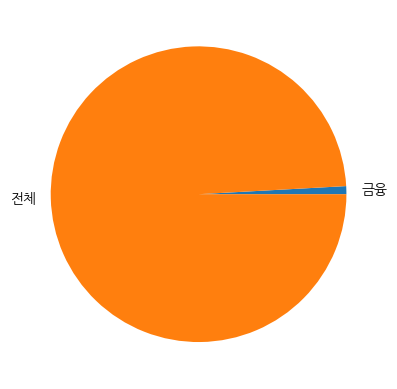

'0.8814102564102564%'

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
import pandas as pd

rc('font',family='NanumGothic')

gyonggi_df = pd.read_csv('./Data/경기 청년 정책 현황.csv')
plt.pie([len(gyonggi_df[ (gyonggi_df['title'].str.find('금융') != -1)]), len(gyonggi_df)], labels=['금융','전체'])
plt.show()
display(str(len(gyonggi_df[ (gyonggi_df['title'].str.find('금융') != -1)])/len(gyonggi_df)*100)+'%')

0.8%는 보통 통계학자들이 유의 수준으로 설정하는 5%보다 현저히 낮은 값이므로  
**경기 데이터**에 한해서 가설에 대한 검증이 이루어졌다라고 봐도 됩니다.

데이터 비교를 위해서 먼저 **서울 몽땅 정보통** 데이터를 먼저 살펴 보도록 하겠습니다.
 
https://youth.seoul.go.kr

**청년 희망 On**에서는 기업과 연계하여 청년들이 취업 및 자기계발할 수 있도록 하였습니다.